In [162]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [163]:
import imageio
import math
import numpy as np
from scipy import ndimage
from scipy import misc

In [164]:
greenPath = './tram/green.png'
posterPath = './tram/poster.png'

In [165]:
greenImg = ndimage.imread(greenPath)
posterImg = ndimage.imread(posterPath)

In [166]:
h = array([[0.8025, 0.0116, -78.2148], [-0.0058, 0.8346, -141.3292], [-0.0006, -0.0002, 1.0]])

In [167]:
def bilinearInterpolation(img, x, y):
    x1 = math.floor(x)
    x2 = math.ceil(x)
    y1 = math.floor(y)
    y2 = math.ceil(y)
    
    r = (1 / ((x2 - x1) * (y2 - y1))) * array([x2 - x, x - x1]).dot(array([[img[y1][x1][0], img[y2][x1][0]], [img[y1][x2][0], img[y2][x2][0]]]).dot([[y2 - y], [y - y1]]))[0]
    g = (1 / ((x2 - x1) * (y2 - y1))) * array([x2 - x, x - x1]).dot(array([[img[y1][x1][1], img[y2][x1][1]], [img[y1][x2][1], img[y2][x2][1]]]).dot([[y2 - y], [y - y1]]))[0]
    b = (1 / ((x2 - x1) * (y2 - y1))) * array([x2 - x, x - x1]).dot(array([[img[y1][x1][2], img[y2][x1][2]], [img[y1][x2][2], img[y2][x2][2]]]).dot([[y2 - y], [y - y1]]))[0]
    
    result = array([r, g, b])
    
    return result

In [168]:
def applyHomography(inImg, outImg, homography):
    result = np.empty_like(outImg)
    result[:] = outImg
    
    for x in range(result.shape[1]):
        for y in range(result.shape[0]):
            new_coords = homography.dot([x, y, 1])
            xp = new_coords[0] / new_coords[2]
            yp = new_coords[1] / new_coords[2]
            
            if xp >= 0 and xp <= inImg.shape[1] - 1 and yp >= 0 and yp <= inImg.shape[0] - 1:
                new_pixel = bilinearInterpolation(inImg, xp, yp)
                result[y][x] = new_pixel
    
    return result

In [169]:
resultImg = applyHomography(posterImg, greenImg, h)

D:\programy\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\programy\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\programy\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


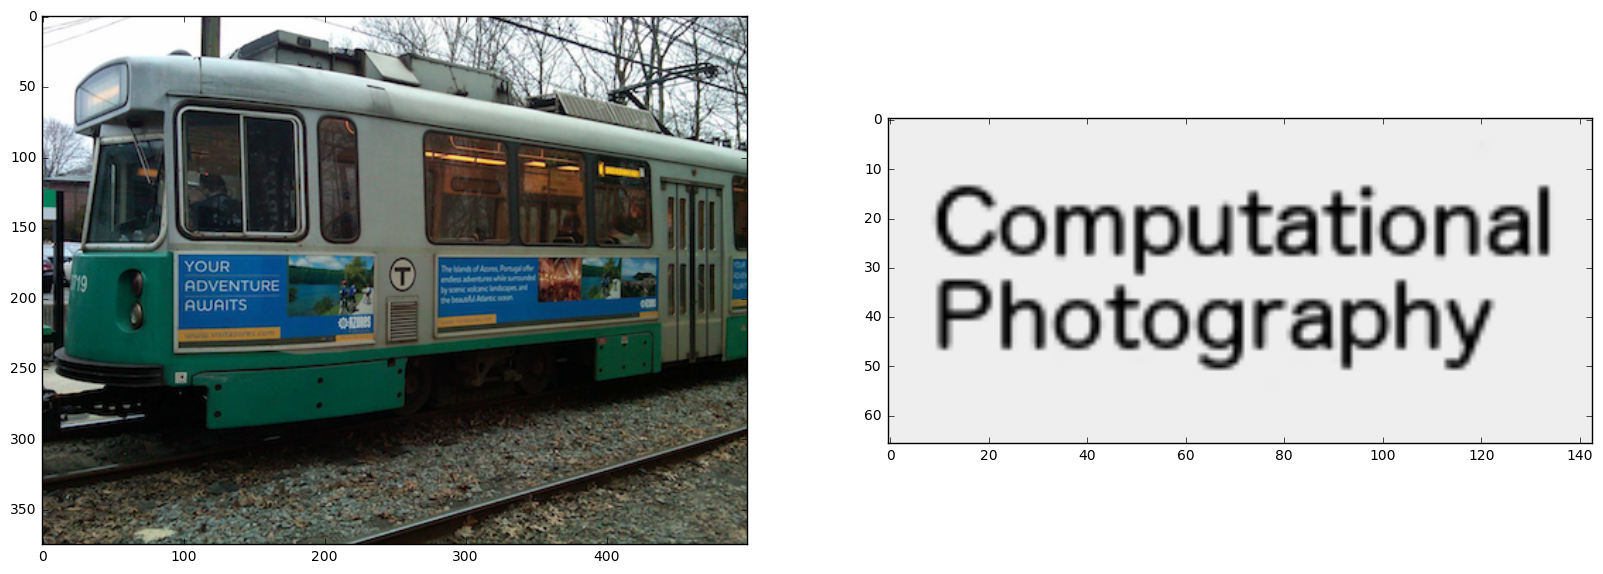

In [170]:
pylab.rcParams['figure.figsize'] = (20, 12)
subplot(1, 2, 1)
imshow(greenImg)
subplot(1, 2, 2)
imshow(posterImg)

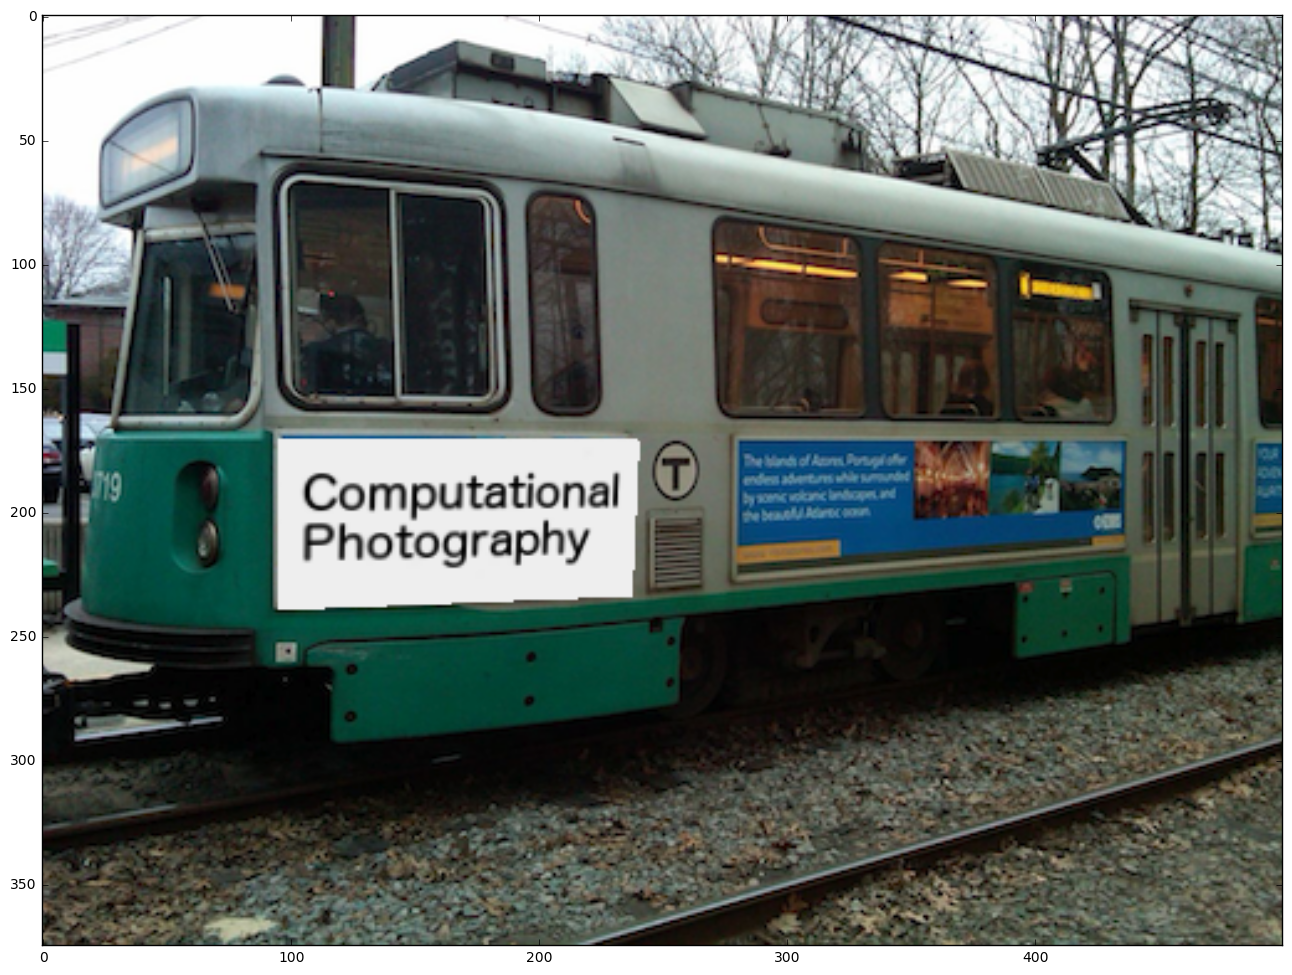

In [171]:
pylab.rcParams['figure.figsize'] = (20, 12)
imshow(resultImg)

In [172]:
misc.imsave('./task2_result.png', resultImg)